<a href="https://colab.research.google.com/github/vaibhavkharate/workshop1/blob/main/Pima_Indians_Diabetes_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Noa Pereira Prada Schnor


###  PIMA INDIANS DIABETES DATASET

The Pima Indian Diabetes Dataset, originally from the National Institute of Diabetes and Digestive and Kidney Diseases, contains information of 768 women from a population near Phoenix, Arizona, USA. The outcome tested was Diabetes, 258 tested positive and 500 tested negative. Therefore, there is one target (dependent) variable and the following attributes (TYNECKI, 2018):


	Pregnancies (number of times pregnant),

	Oral glucose tolerance test - OGTT (two hour plasma glucose concentration after 75g anhydrous glucose in mg/dl),

	Blood Pressure (Diastolic Blood Pressure in mmHg),

	Skin Thickness (Triceps skin fold thickness in mm),

	Insulin (2 h serum insulin in mu U/ml),

	BMI (Body Mass Index in kg/m<sup>2</sup>),

	Age (years),

	Pedigree Diabetes Function ('function that represents how likely they are to get the disease by extrapolating from their ancestor’s history')

### PIMA INDIANS AND DIABETES

Pima are descendants of people that inhabited the Sonoran desert and Sierra Madre areas for centuries. Around 300 B.C. they moved to Gila River Valley at the time  in Mexico, but region that was acquired by the United States in 1853. A Pima reservation was created in Arizona in 1959 and they adapted to their desert homeland by directing water to support a subsistence agriculture. Around 1900 the number of population of white settlers increased and a diversion of the water happened. That had an impact of Pima's food intake and way of life. Pima Indians used to farm sustained through physical labour to a little labour and scarce of food. As a consequence they food intake became high in fat and their lifestyle was mainly sedentary. That resulted in development of diabetes among the Arizona Pimas, and it drawed attention as they had the highest recorded prevalence and incidence of type 2 diabetes (T2DM) of any geographically-defined population (SCHULZ et al, 2015).
The Pima population has been under study by the National Institute of Diabetes and Digestive and Kidney Diseases at intervals of 2 years since 1965. As epidemiological evidence indicates that T2DM results from interaction of genetic and environmental factors, the Pima Indians Diabetes Dataset includes information about attributes that could and should be related to the onset of diabetes and its future complications.

### TRICEPS SKIN FOLD THICKNESS

Chandra-Selvi at al (2016) defined adipose tissue as a <i>'loose connective tissue composed mainly of adipocytes that has an unlimited growth potential at any stage of life, excess of adipose tissue predisposes to many diseases-development of insulin resistance'</i>. Their study found that the skinfold thickness gradually decreased in diabetic patients as the duration of disease increased. However, the Pima Indians Diabetes Dataset does not provide information on the duration of the Diabetes.  The researchers discussed the results and concluded that in diabetic patients, there is an efflux of free fatty acids from the adipose tissue, resulting in a decrease of skin fold thickness as the duration of disease increases (CHANDRA-SELVI at al, 2016).
Neverthless, there is still very limited prospective information evaluating the relationship of skinfold thickness with incident T2DM (RUIZ-ALEJOS et al, 2020).
Triceps skinfold thickness in millimeters for females aged 20 and over and number of examined persons, mean, standard error of the mean, and selected percentiles, by race and ethnicity and age: United States, 2007–2010 (FRYAR et al, 2012).

<a href="https://ibb.co/4NDNNx1"><img src="https://i.ibb.co/KyQyyHK/table-triceps-skin-fold.png" alt="table-triceps-skin-fold" border="0"></a>

### OBESITY AND DIABETES

Obesity, assessed by Body Mass Index (BMI), is intimately associated with diabetes and its impact on the development of T2DM has been largely described in large cohort prospective studies (VAN GAAL and SCHEEN, 2015; WILDING, 2014; RUIZ-ALEJOS et al, 2020). In fact, most of the individuals with T2DM are overweight or obese <sup>5</sup>.  Despite the link between obesity and T2DM not all obese develops diabetes and not all diabetics are obese people. Diabetic lean people probably have a stronger genetic component for T2DM than overweight and obese individuals (WILDING, 2014).
Accordingly to Ruiz-Alejos and col (2020) 'there is no specific recommendation about the use of an anthropometric measurement as a marker for T2DM risk prediction besides BMI and waist circumference'. Unfortunately the waist circumference is a measurement not included in the Pima Indians Diabetes Dataset.
BMI provides a simple, yet accurate method for indicating nutritional status in adults (as it can be seem in the Table below), and it can be calculated by dividing the individual's weight (in kg) by the square of their height (in metres).
<img src="https://i.ibb.co/647ZL2X/bmi.png" alt="bmi" border="0">

<img src="https://i.ibb.co/HTqTfdr/WHO-Europe-Nutrition-Body-mass-index-BMI.png" alt="WHO-Europe-Nutrition-Body-mass-index-BMI" border="0">
Table. Nutritional Status. Source: World Health Organization.

## OBJECTIVE

The objective of this project is:
1. Analyse the dataset under the point of view of a Dietitian.
2. Apply machine learning techniques resulting in bridging the gap between datasets and human knowledge.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.model_selection as mod
import sklearn.neighbors as nei
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, precision_recall_curve, average_precision_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import operator
%matplotlib inline

In [4]:
url="https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv"

In [5]:
pima = pd.read_csv(url)

#### Check the DataFrame & Descriptive Statistics and Analysis of Pima Indians Dataset

In [6]:
pima.shape

(768, 9)

In [7]:
type(pima)

pandas.core.frame.DataFrame

In [8]:
pima_row_idx = pima.index
pima_row_idx

RangeIndex(start=0, stop=768, step=1)

In [9]:
pima_col_idx = pima.columns
pima_col_idx

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
pima.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [11]:
pima.head (5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
pima.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
Nutritional_status = pd.Series([])

In [14]:
# Nutritional status based on BMI

for i in range(len(pima)):
    if pima['BMI'][i] == 0.0:
        Nutritional_status[i]="NA"

    elif pima['BMI'][i] < 18.5:
        Nutritional_status[i]="Underweight"

    elif pima['BMI'][i] < 25:
        Nutritional_status[i]="Normal"

    elif pima['BMI'][i] >= 25 and pima['BMI'][i] < 30:
        Nutritional_status[i]="Overweight"

    elif pima['BMI'][i] >= 30:
        Nutritional_status[i]="Obese"

    else:
        Nutritional_status[i]= pima['BMI'][i]

In [15]:
# Insert new column - Nutritional Status
pima.insert(6, "Nutritional Status", Nutritional_status)

In [16]:
# Check df containing new column
pima.head (5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Nutritional Status,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,Obese,0.627,50,1
1,1,85,66,29,0,26.6,Overweight,0.351,31,0
2,8,183,64,0,0,23.3,Normal,0.672,32,1
3,1,89,66,23,94,28.1,Overweight,0.167,21,0
4,0,137,40,35,168,43.1,Obese,2.288,33,1


In [17]:
pima['Nutritional Status'].value_counts()

Nutritional Status
Obese          472
Overweight     179
Normal         102
NA              11
Underweight      4
Name: count, dtype: int64

##### 11 women don't have information about BMI. Only 106 of 758 women have normal weight. Most of the women present overweight or obesity.

In [19]:
OGTT_Interpretation = pd.Series([])

In [21]:
for i in range(len(pima)):
    if pima['Glucose'][i] == 0.0:
        OGTT_Interpretation [i]="NA"

    elif pima['Glucose'][i] <= 140:
        OGTT_Interpretation [i]="Normal"

    elif pima['Glucose'][i] > 140 & pima['Glucose'][i] <= 198:
        OGTT_Interpretation [i]="Impaired Glucose Tolerance"

    elif pima['Glucose'][i] > 198:
        OGTT_Interpretation[i]="Diabetic Level"

    else:
        OGTT_Interpretation [i]= pima['Glucose'][i]

In [22]:
# Insert new column - Glucose Result
pima.insert(2, "Glucose Result", OGTT_Interpretation)

In [23]:
pima['Glucose Result'].value_counts()

Glucose Result
Normal                        571
Impaired Glucose Tolerance    192
NA                              5
Name: count, dtype: int64

##### Not a single individual from the sample showed OGTT result at "Diabetic levels". Would be interesting to calculate HOMA-IR to get information about insulin resistance of the sample. *****DISCUSS HERE ABOUT GLUCOSE INTOLERANCE AND INSULIN RESISTANCE********

In [24]:
Impaired_Glucose_Tolerance_Diabetic = ((pima ['Glucose'] > 140 ) & (pima ['Glucose'] <= 198) & (pima ['Outcome'] == 1)).sum()
Impaired_Glucose_Tolerance_Diabetic

131

##### Not every women with impaired glucose tolerance have diabetes. That can show that the ones with impaired glucose tolerance might be in risk of developing diabetes or are diabetic, but not already diagnosed.

In [25]:
Normal_Glucose_Diabetic = ((pima ['Glucose'] != 0 ) & (pima ['Glucose'] <= 140) & (pima ['Outcome'] == 1)).sum()
Normal_Glucose_Diabetic

134

##### Half of the diabetic women showed normal glucose level. Information regarding drug therapy is needed.

In [26]:
# Create Percentile of skin thickness column

Percentile_skin_thickness = pd.Series([])

In [27]:
# Check how many women are 80 or older (the Percentile skin thickeness depend of skin fold and age)

pima['Age'].value_counts()

Age
22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
43    13
40    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: count, dtype: int64

In [28]:
#  Check skin fold thickness Percentile

for i in range(len(pima)):


    if pima["Age"][i] >= 20.0 and pima["Age"][i] <= 79.0:

        if pima["SkinThickness"][i] == 0.0:
            Percentile_skin_thickness[i]=" 0 NA"

        elif pima["SkinThickness"][i] < 11.9:
            Percentile_skin_thickness[i]="1 <P5th"

        elif pima["SkinThickness"][i] == 11.9:
            Percentile_skin_thickness[i]="2 P5th"

        elif pima["SkinThickness"][i] > 11.9 and pima["SkinThickness"][i] < 14.0:
            Percentile_skin_thickness[i]="3 P5th - P10th"

        elif pima["SkinThickness"][i] == 14.0:
            Percentile_skin_thickness[i]="4 P10th"

        elif pima["SkinThickness"][i] > 14.0 and  pima["SkinThickness"][i] < 15.8:
            Percentile_skin_thickness[i]="5 P10th - P15th"

        elif pima["SkinThickness"][i] == 15.8:
            Percentile_skin_thickness[i]="6 P15th"

        elif pima["SkinThickness"][i] > 15.8 and pima["SkinThickness"][i] < 18.0:
            Percentile_skin_thickness[i]="7 P15th - P25th"

        elif pima["SkinThickness"][i] == 18.0:
            Percentile_skin_thickness[i]="8 P25th"

        elif pima["SkinThickness"][i] > 18.0 and pima["SkinThickness"][i] < 23.5:
            Percentile_skin_thickness[i]="9 P25th - P50th"

        elif pima["SkinThickness"][i] == 23.5:
            Percentile_skin_thickness[i]="10 P50th"

        elif pima["SkinThickness"][i] > 23.5 and pima["SkinThickness"][i] < 29.0:
            Percentile_skin_thickness[i]="11 P50th - P75th"

        elif pima["SkinThickness"][i] == 29.0:
            Percentile_skin_thickness[i]="12 P75th"

        elif pima["SkinThickness"][i] > 29.0 and pima["SkinThickness"][i] < 31.9:
            Percentile_skin_thickness[i]="13 P75th - P85th"

        elif pima["SkinThickness"][i] == 31.9:
            Percentile_skin_thickness[i]="14 P85th"

        elif pima["SkinThickness"][i] > 31.9 and pima["SkinThickness"][i] < 33.7:
            Percentile_skin_thickness[i]="15 P85th - P90th"

        elif pima["SkinThickness"][i] == 33.7:
            Percentile_skin_thickness[i]="16 P90th"

        elif pima["SkinThickness"][i] > 33.7 and pima["SkinThickness"][i] < 35.9:
            Percentile_skin_thickness[i]="17 P90th - P95th"

        elif pima["SkinThickness"][i] == 35.9:
            Percentile_skin_thickness[i]="18 P95th"

        elif pima["SkinThickness"][i] > 35.9:
            Percentile_skin_thickness[i]="19 >P95th"

    elif pima["Age"][i] >= 80.0:  #Only 1 woman is 81 years old
        if  pima["SkinThickness"][i] > 31.7:
            Percentile_skin_thickness[i]="20 >P95th"


<i>**Note**</i>: As I have 2 >P95 I chose to add numbers in front of each percentile to easily visualize which >P95 it belonged.

In [29]:
# Insert new column - Percentile of skin thickness

pima.insert(4, "Percentile skin thickness", Percentile_skin_thickness)

In [30]:
# Check the first 5 rows

pima.head(5)

,Pregnancies,Glucose,Glucose Result,BloodPressure,Percentile skin thickness,SkinThickness,Insulin,BMI,Nutritional Status,DiabetesPedigreeFunction,Age,Outcome
0,6,148,Impaired Glucose Tolerance,72,17 P90th - P95th,35,0,33.6,Obese,0.627,50,1
1,1,85,Normal,66,12 P75th,29,0,26.6,Overweight,0.351,31,0
2,8,183,Impaired Glucose Tolerance,64,0 NA,0,0,23.3,Normal,0.672,32,1
3,1,89,Normal,66,9 P25th - P50th,23,94,28.1,Overweight,0.167,21,0
4,0,137,Normal,40,17 P90th - P95th,35,168,43.1,Obese,2.288,33,1


##### It looks like the Percentile of the triceps skin fold thickness can predict the Nutritional Status.

In [31]:
# Check number of women x Percentile of skin thickness

pima['Percentile skin thickness'].value_counts()

Percentile skin thickness
 0 NA               227
19 >P95th           145
11 P50th - P75th     87
9 P25th - P50th      79
15 P85th - P90th     50
13 P75th - P85th     46
17 P90th - P95th     23
8 P25th              20
7 P15th - P25th      20
3 P5th - P10th       18
12 P75th             17
1 <P5th              15
5 P10th - P15th      14
4 P10th               6
20 >P95th             1
Name: count, dtype: int64

##### 227 women don't have information regarding skin fold. Most of the sample have Percentile of skin thickness greater than 95th. 53 women had value below P15 indicating that they might be malnourished. Only one woman is 80 years old or older and she presents a Percentile of skin thickness greater than 95th.

In [32]:
diabetic_malnourished_st = ((pima ['SkinThickness'] < 15.8) & (pima ['Outcome'] == 1)).sum()
diabetic_malnourished_st

94

In [33]:
diabetic_malnourished_bmi = ((pima ['BMI'] < 18.5) & (pima ['Outcome'] == 1)).sum()
diabetic_malnourished_bmi

2

In [34]:
diabetic_malnourished_bmi_st = ((pima ['BMI'] < 18.5) & (pima ['SkinThickness'] < 15.8) & (pima ['Outcome'] == 1)).sum()
diabetic_malnourished_bmi_st

2

##### Interesting to note that 94 diabetic women were classified as underweight/malnourished based only on Skin thickness, but only 2 diabetic women presented underweight/malnutrition when considering BMI or BMI & Skin Thickness. Skinfold thicknesses are difficult measurements to make with precision and accuracy without rigorous training, for that reason they are rarely used today and not universally applicable. Besides, skinfold thickness can be problematic to identify malnutrition in many individuals as they vary with diseases such as diabetes, menopause, and hydrational status. That way, more data should be included in this dataset to help to identify malnutrition using skinfold thickness measurement.

In [35]:
# Minimum

In [36]:
pima.min()

Pregnancies                                           0
Glucose                                               0
Glucose Result               Impaired Glucose Tolerance
BloodPressure                                         0
Percentile skin thickness                          0 NA
SkinThickness                                         0
Insulin                                               0
BMI                                                 0.0
Nutritional Status                                   NA
DiabetesPedigreeFunction                          0.078
Age                                                  21
Outcome                                               0
dtype: object

##### It can be seem that only adult women were included as the minimum age is 21 years old. It can be noticed that a number of women don't have information of some of the attributes, such as glucose, blood pressure, etc as the minimum value is zero.

In [37]:
# Maximum

In [38]:
pima.max()

Pregnancies                               17
Glucose                                  199
Glucose Result                        Normal
BloodPressure                            122
Percentile skin thickness    9 P25th - P50th
SkinThickness                             99
Insulin                                  846
BMI                                     67.1
Nutritional Status               Underweight
DiabetesPedigreeFunction                2.42
Age                                       81
Outcome                                    1
dtype: object

###### The nutritional status 'underweight' should not be classified as Max Value in medical point of view. However, it was considered as a Max value as it starts with the letter U.

In [39]:
#Check if the sample were classified as Underweight presented a BMI lower than 18.5

pima_underweight = pima[pima['Nutritional Status'] =='Underweight']
pima_underweight

,Pregnancies,Glucose,Glucose Result,BloodPressure,Percentile skin thickness,SkinThickness,Insulin,BMI,Nutritional Status,DiabetesPedigreeFunction,Age,Outcome
239,0,104,Normal,76,0 NA,0,0,18.4,Underweight,0.582,27,0
418,1,83,Normal,68,0 NA,0,0,18.2,Underweight,0.624,27,0
438,1,97,Normal,70,5 P10th - P15th,15,0,18.2,Underweight,0.147,21,0
526,1,97,Normal,64,9 P25th - P50th,19,82,18.2,Underweight,0.299,21,0


In [40]:
pima['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

##### 500 not diabetic and 268 are diabetic

In [41]:
# Another way of counting the outcome (diabetes)
count_not_diabetic = len(pima[pima['Outcome']==0])
count_not_diabetic

500

In [45]:
import pandas as pd
pima = pd.read_csv('diabetes.csv')
pima.groupby('Outcome').mean()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


##### It looks like the average of all features is higher in diabetic women.

In [46]:
pima.mean()

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

##### As some of the women have no information of a number of attributes, such as glucose, blood pressure and BMI the average of those items might not be correct. To get the correct value only the women with a value > zero should be included to calculate the average.

In [47]:
# Shows women that contains information about Glucose

pima_glucose = pima.loc[pima['Glucose'] != 0]

In [48]:
pima_glucose.shape

(763, 9)

##### Most women of the sample have data regarding glucose (only 5 of them don't have any glucose value) as it is an important information to check the health status of a diabetic person.

In [49]:
# Check average of glucose from women that don't have zero value of glucose

In [50]:
pima_glucose['Glucose'].mean()

121.6867627785059

##### The average of glucose is at the normal range (less than 140 mg/dl).

In [51]:
pima_glucose.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.311871,110.643863,68.213280,19.631791,69.160966,30.317304,0.430662,31.247485
1,4.860902,142.319549,70.800752,22.056391,101.090226,35.106015,0.550605,37.052632


In [52]:
# Check minimum and maximum values of glucose from women that don't have zero value of glucose

In [53]:
pima_glucose['Glucose'].min()

44

In [54]:
pima_glucose['Glucose'].max()

199

##### As it shows above, some women have information about glucose but no information about insulin. Moreover, it shows that 5 women don't have information about glucose as the result shows 763 rows. Furthermore, the maximum value of glucose is 199, considered a Diabetic level. Therefore, even diagnosed with diabetes they don't present high glucose value. The dataset should have information about drug therapy.

In [55]:
# Shows women that have information about Blood pressure

pima_BloodPressure = pima.loc[pima['BloodPressure'] != 0]

In [56]:
pima_BloodPressure.shape

(733, 9)

In [57]:
pima_BloodPressure['BloodPressure'].mean()

72.40518417462484

In [58]:
# Minimum and maximum of Blood Pressure from women that don't have zero value of Blood Pressure

In [59]:
pima_BloodPressure['BloodPressure'].min()

24

In [60]:
pima_BloodPressure['BloodPressure'].max()

122

In [61]:
pima_insulin = pima.loc[pima['Insulin'] != 0]

In [62]:
pima_insulin.shape

(394, 9)

In [63]:
# Check average value of insulin from women that don't have zero value of insulin

pima_insulin['Insulin'].mean()

155.5482233502538

In [64]:
# Check minimum and maximum of Insulin value from women that don't have zero value of insulin

In [65]:
pima_insulin['Insulin'].min()

14

In [66]:
pima_insulin['Insulin'].max()

846

###### Normal range of 2h insulin is from 16 to 166 mIU/L. The average value of 2h insulin of the samples show a normal range. However, some women of the sample seem to present high level of insulin level. It might be due obesity, early stage of T2DM or excessive insulin administration.

In [67]:
# Check women that don't have zero value of BMI

pima_BMI = pima.loc[pima['BMI'] != 0]

In [68]:
pima_BMI.shape

(757, 9)

In [69]:
# Check average of BMI from women that don't have zero value of BMI

pima_BMI['BMI'].mean()

32.457463672391015

##### The average value of BMI indicates obesity (BMI >= 30 kg/m2)

In [70]:
# Check minimun and maximum value of BMI from women that don't have zero value of BMI

In [71]:
pima_BMI['BMI'].min()

18.2

In [72]:
pima_BMI['BMI'].max()

67.1

##### The minimum value of BMI shows that there is no case of underweight, but the maximum value shows cases of women with morbid obesity (BMI >= 40kg/m2).

In [73]:
# Check only the women that have all the values of BMI, Glucose, Insulin and Blood Pressure

pima_all = pima.loc[(pima['BMI'] != 0) & (pima['Insulin'] != 0) & (pima['BloodPressure'] != 0) & (pima['Glucose'] != 0)]

In [74]:
pima_all.shape

(392, 9)

##### Only 392 women have information about all the attributes. That number represents less than half of the sample (around 49% of the women of the sample have all information of all attributes).

In [75]:
pima_all['Outcome'].value_counts()

Outcome
0    262
1    130
Name: count, dtype: int64

##### 262 women don't have DM and 130 have DM.

In [76]:
pima_all.mean()

Pregnancies                   3.301020
Glucose                     122.627551
BloodPressure                70.663265
SkinThickness                29.145408
Insulin                     156.056122
BMI                          33.086224
DiabetesPedigreeFunction      0.523046
Age                          30.864796
Outcome                       0.331633
dtype: float64

In [77]:
pima_all.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,2.721374,111.431298,68.969466,27.251908,130.854962,31.750763,0.472168,28.347328
1,4.469231,145.192308,74.076923,32.961538,206.846154,35.777692,0.625585,35.938462


##### Diabetic women tend to have higher number of pregnancies, higher level of glucose, higher Blood Pressure, Skin Thickness, Insulin, BMI, Diabetes Pedigree Function and Age. Both groups present BMI that indicates obesity. Women that have Diabetes have an average of insulin that is higher than the normal range (16 - 166  mIU/L). Both groups have average of glucose higher than the normal range (<= 100 mg/dL). It might indicate that some non diabetic women are in risk of have Diabetes in the future, specially the ones with higher levels of insulin (that might have insulin resistance).

In [78]:
pima_all.min()

Pregnancies                  0.000
Glucose                     56.000
BloodPressure               24.000
SkinThickness                7.000
Insulin                     14.000
BMI                         18.200
DiabetesPedigreeFunction     0.085
Age                         21.000
Outcome                      0.000
dtype: float64

In [79]:
pima_all.max()

Pregnancies                  17.00
Glucose                     198.00
BloodPressure               110.00
SkinThickness                63.00
Insulin                     846.00
BMI                          67.10
DiabetesPedigreeFunction      2.42
Age                          81.00
Outcome                       1.00
dtype: float64

In [80]:
diabetic_malnourished = ((pima_all ['SkinThickness'] < 15.8) & (pima_all ['Outcome'] == 1)).sum()
diabetic_malnourished

4

##### 4 from 130 Diabetic women are malnourished.

In [81]:
diabetic_overweight_obese = ((pima_all ['BMI'] <= 30) & (pima_all ['Outcome'] == 1)).sum()
diabetic_overweight_obese

20

##### 20 from 130 Diabetic women are overweight or obese.

### Attributes Distribution

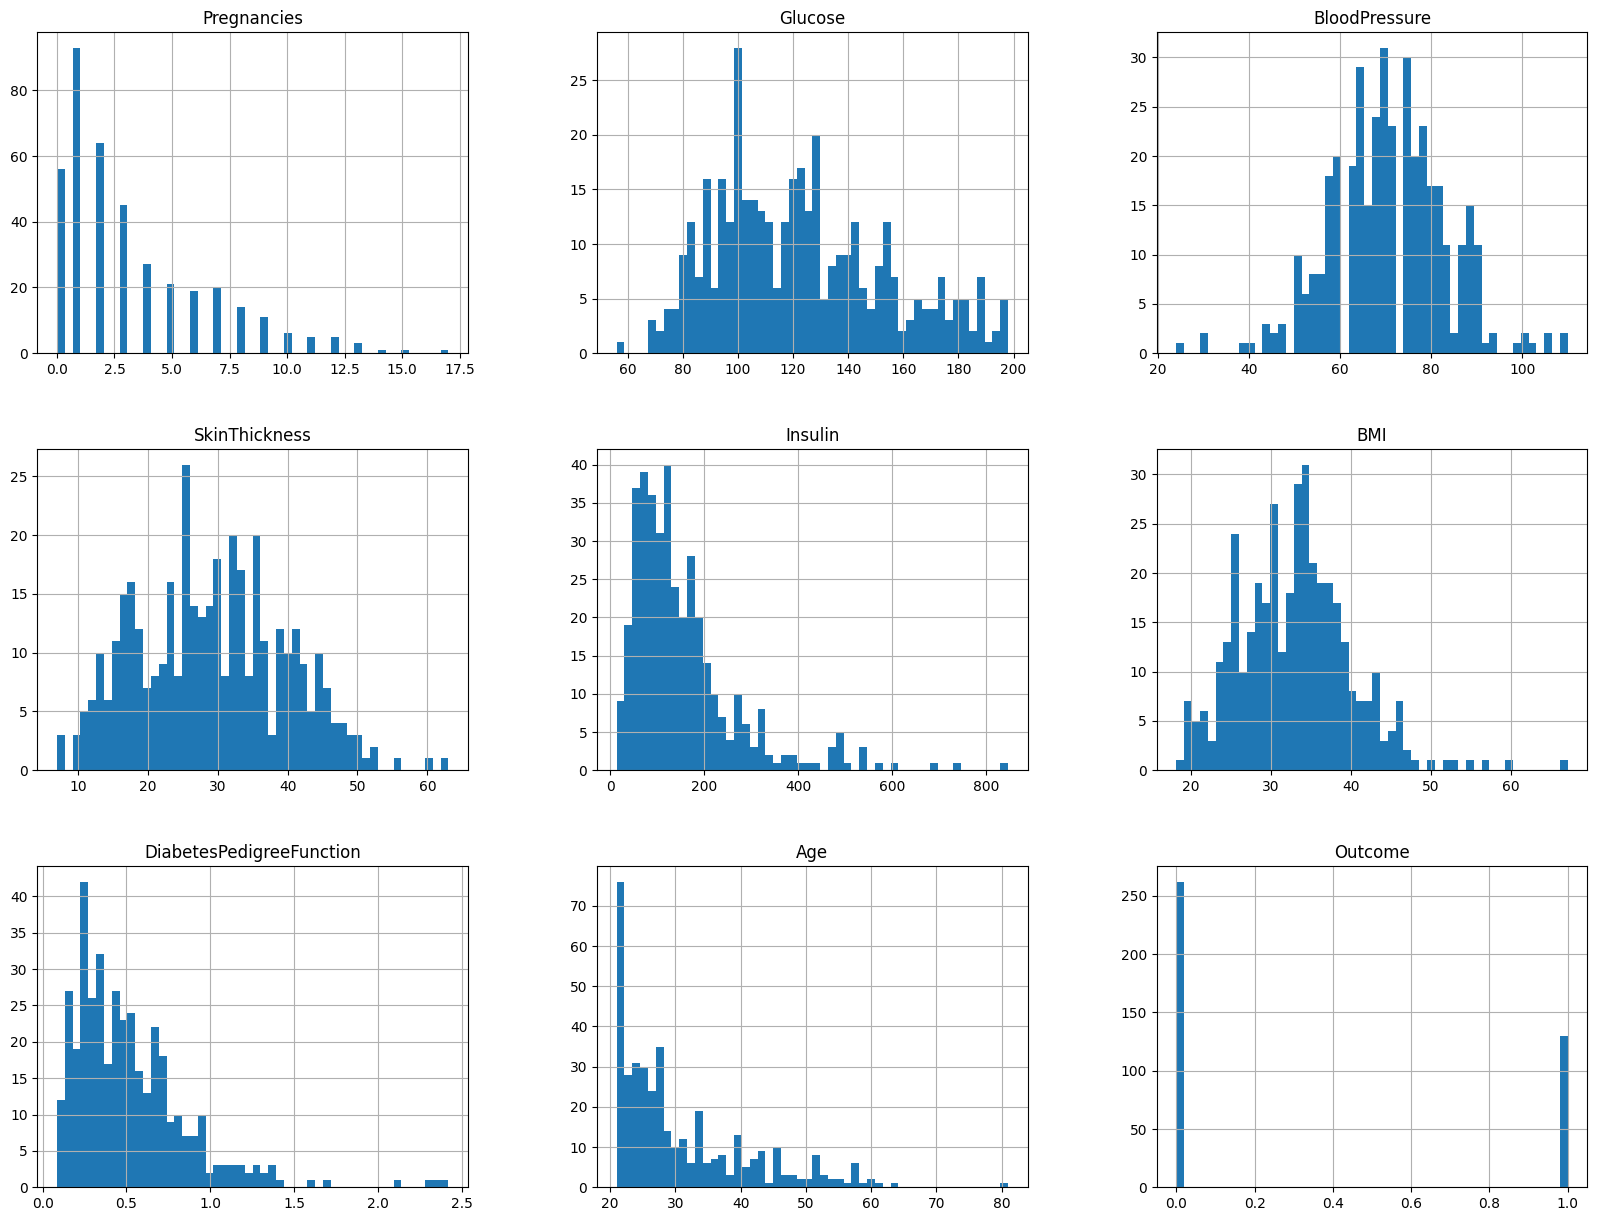

In [82]:
# Histogram
pima_all.hist(bins=50, figsize=(20, 15))
plt.show()

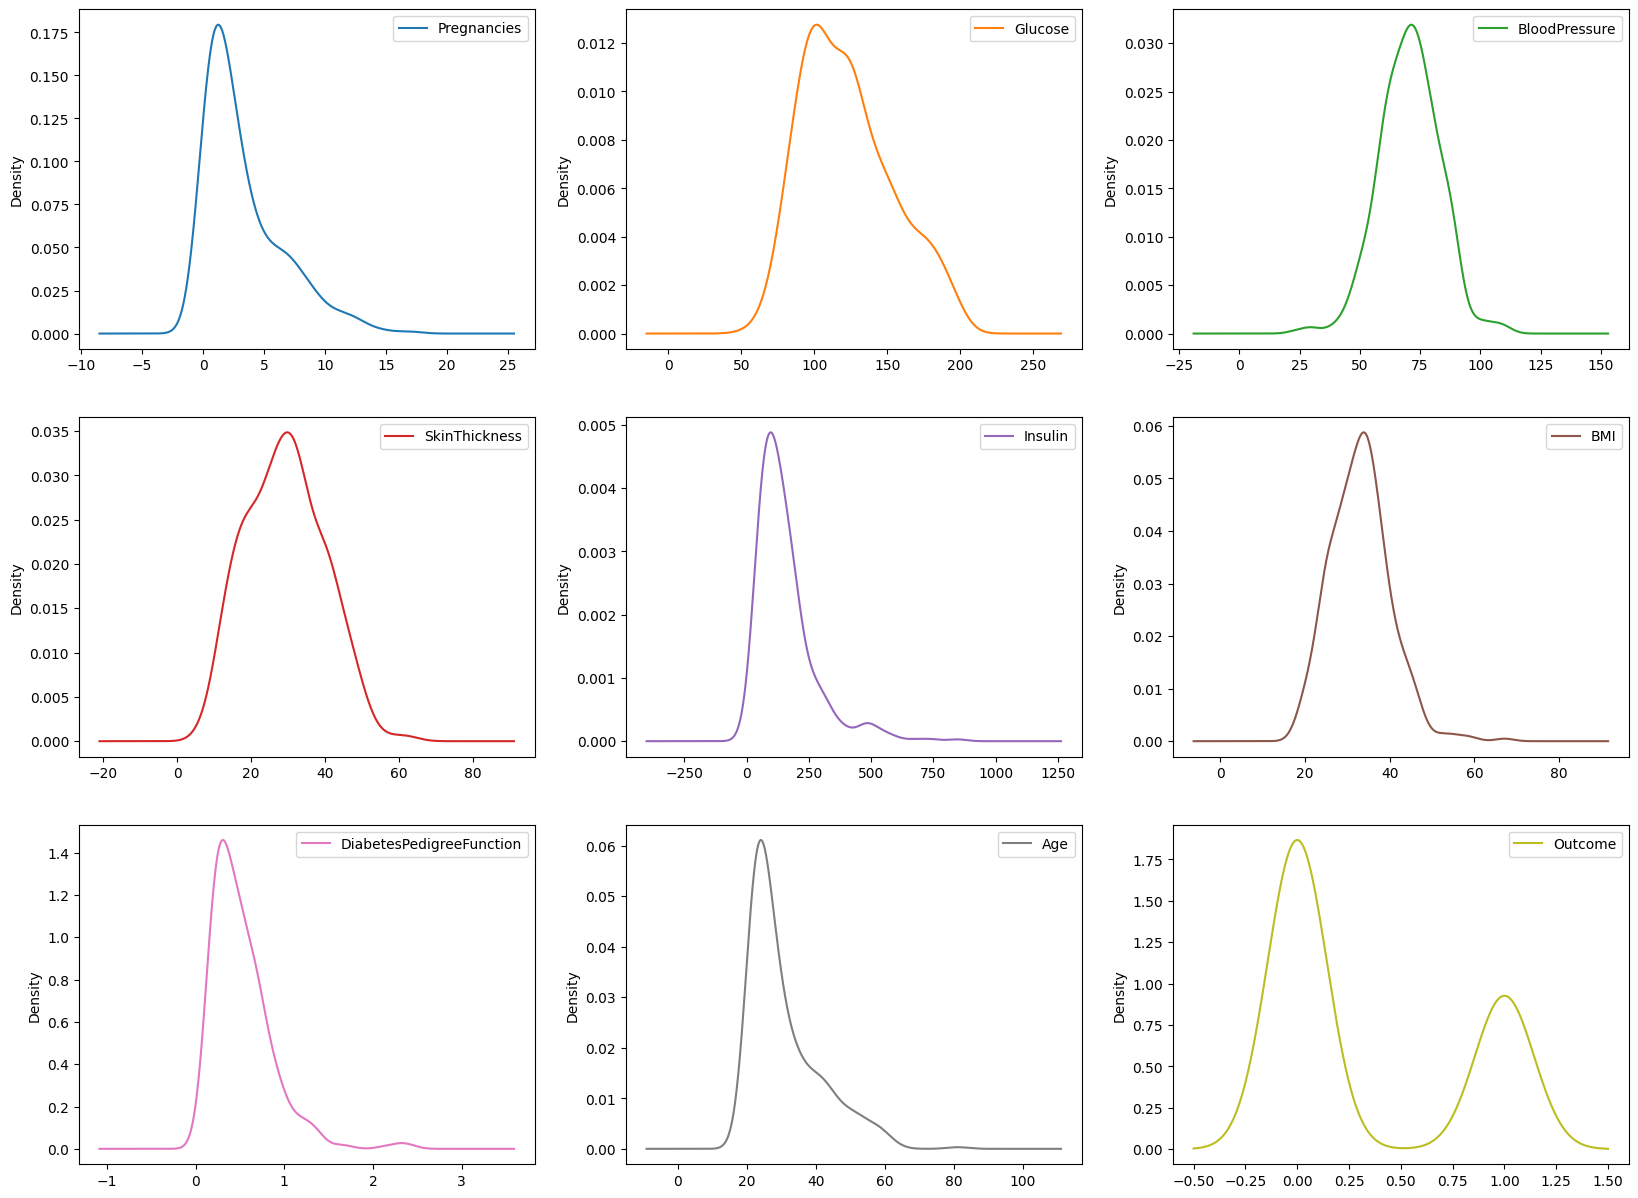

In [83]:
# Density plots for all attributes to visualize the distribution of each attribute
pima_all.plot(kind='density', subplots=True, layout=(3,3), figsize=(20, 15), sharex=False)
plt.show()

Pregnancies                    Axes(0.125,0.653529;0.227941x0.226471)
Glucose                     Axes(0.398529,0.653529;0.227941x0.226471)
BloodPressure               Axes(0.672059,0.653529;0.227941x0.226471)
SkinThickness                  Axes(0.125,0.381765;0.227941x0.226471)
Insulin                     Axes(0.398529,0.381765;0.227941x0.226471)
BMI                         Axes(0.672059,0.381765;0.227941x0.226471)
DiabetesPedigreeFunction           Axes(0.125,0.11;0.227941x0.226471)
Age                             Axes(0.398529,0.11;0.227941x0.226471)
Outcome                         Axes(0.672059,0.11;0.227941x0.226471)
dtype: object

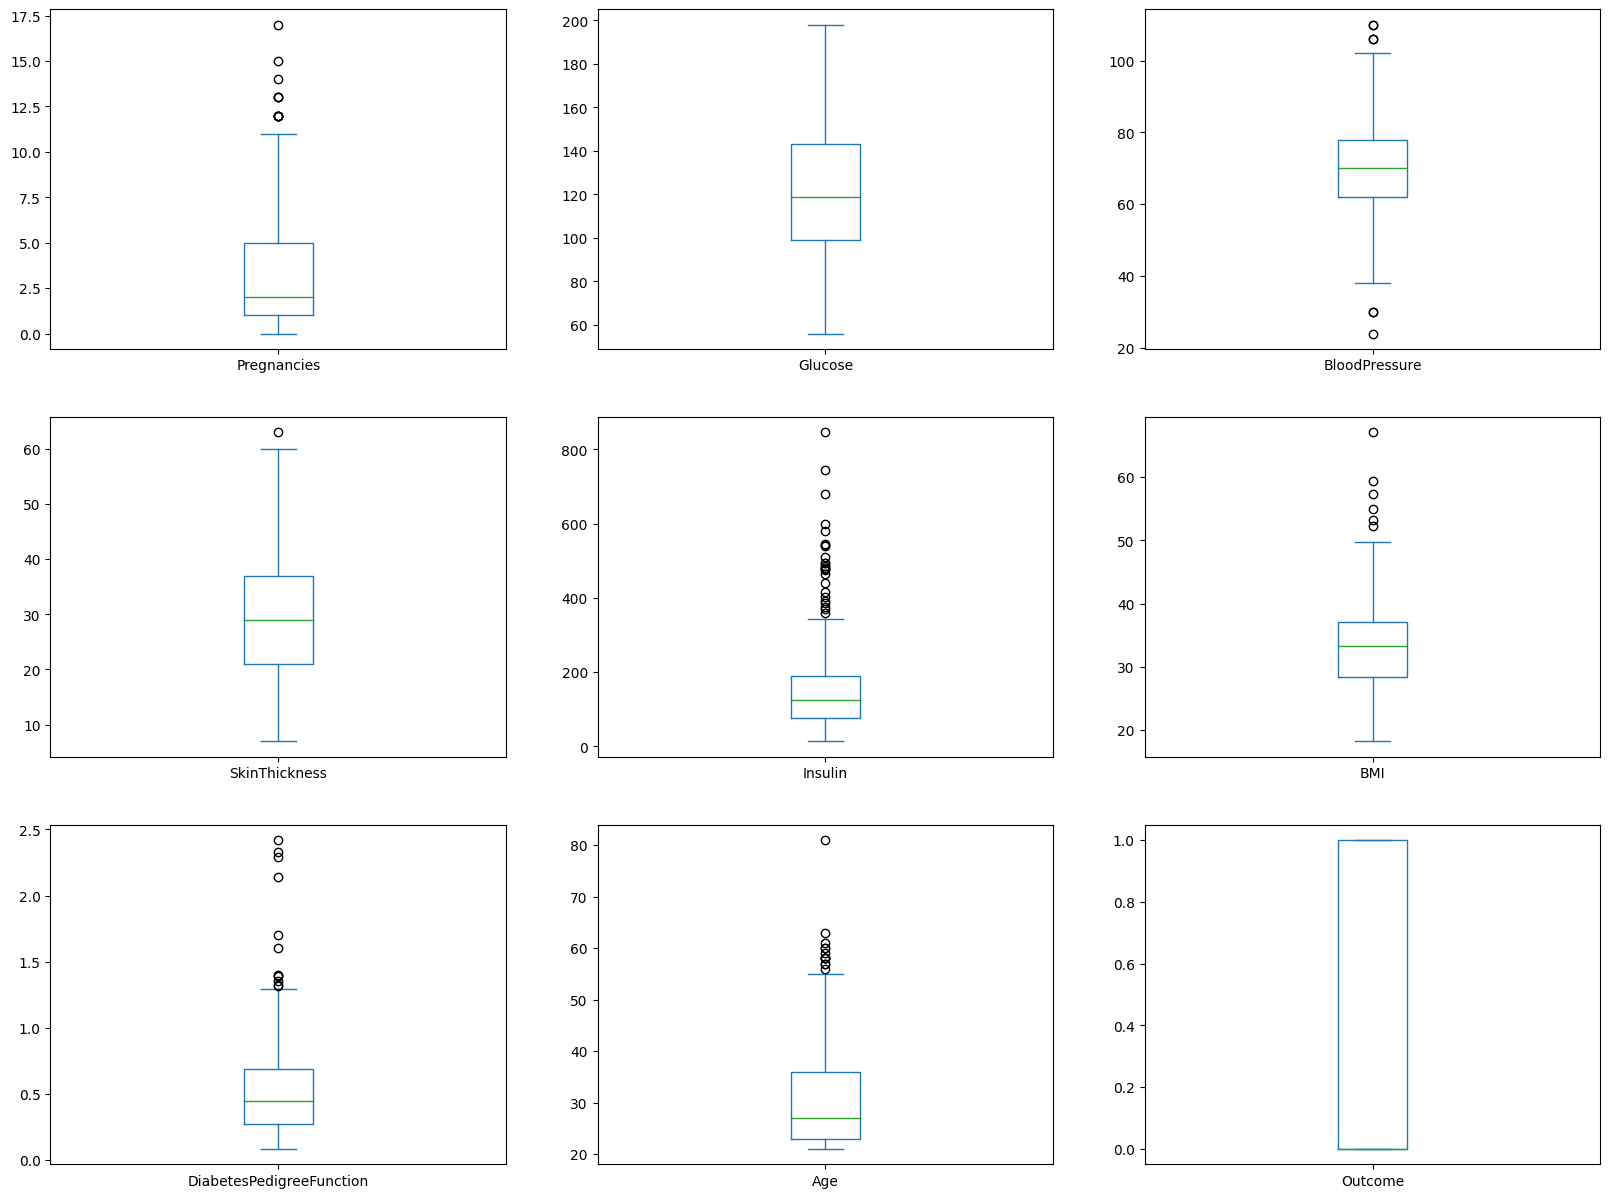

In [84]:
#Box and Whisker plot to visualize the distribution of all atributes
pima_all.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20,15))

In [85]:
#Skew of attributes distributions
skew=pima_all.skew(axis = 1)

##### Bell shape curve: Blood Pressure
##### Right-Skewed: Age, Insulin, Pregnancies,  Diabetes Pedigree Function

##### Short IQR: insulin, Diabetes Pedigree Function, Blood Pressure and BMI
##### At least 75% of the women:
+ are 25 years old or older
+ have BMI nearly 30 kg/m2
+ have insulin level 100 or more
+ have 1 or more pregnancies
+ have glucose level of 100 mg/dL or more
+ have blood pressure of 60 mmHg or more

## Correlation

In [86]:
# Correlation between the different characteristics. Closer to 1 better is the correlation.

corr_matrix_pearson = pima_all.corr(method='pearson')
corr_matrix_pearson

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.198291,0.213355,0.093209,0.078984,-0.025347,0.007562,0.679608,0.256566
Glucose,0.198291,1.000000,0.210027,0.198856,0.581223,0.209516,0.140180,0.343641,0.515703
BloodPressure,0.213355,0.210027,1.000000,0.232571,0.098512,0.304403,-0.015971,0.300039,0.192673
SkinThickness,0.093209,0.198856,0.232571,1.000000,0.182199,0.664355,0.160499,0.167761,0.255936
Insulin,0.078984,0.581223,0.098512,0.182199,1.000000,0.226397,0.135906,0.217082,0.301429
BMI,-0.025347,0.209516,0.304403,0.664355,0.226397,1.000000,0.158771,0.069814,0.270118
DiabetesPedigreeFunction,0.007562,0.140180,-0.015971,0.160499,0.135906,0.158771,1.000000,0.085029,0.209330
Age,0.679608,0.343641,0.300039,0.167761,0.217082,0.069814,0.085029,1.000000,0.350804
Outcome,0.256566,0.515703,0.192673,0.255936,0.301429,0.270118,0.209330,0.350804,1.000000


#### There are no strong correlation between the features. The 'strongest' ones are the following (as expected):
+ Age x pregnancies (0.68) - Older women tend to have higher number of pregnancies
+ Glucose x insulin (0.58)
+ Glucose x outcome (0.52) - Women that have higher level of glucose tend to have higher level of insulin and have DM
+ Skin fold thickness x BMI (0.66)  - Women with higher skin fold thickness value have higher BMI (and probably are overweight/obese)

##### Negative correlation:
+ BMI x Pregnancies (-0.025)
+ Blood Pressure x Diabetes Pedigree Function (-0.016)

<Axes: >

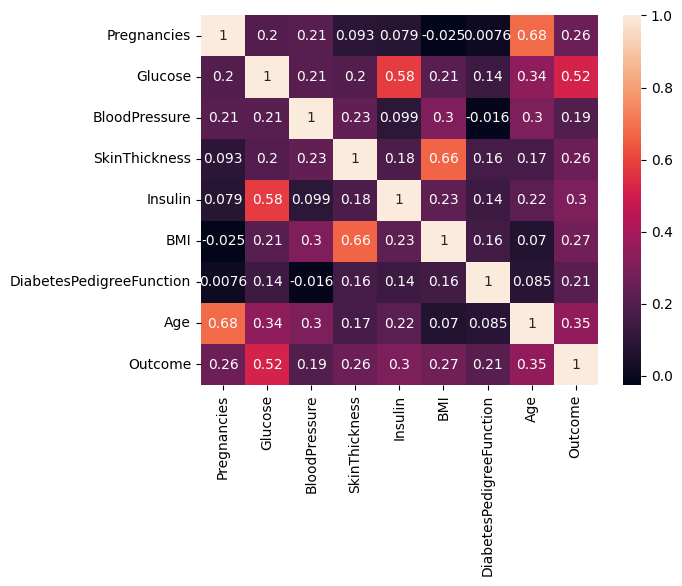

In [87]:
sns.heatmap(corr_matrix_pearson, annot = True)

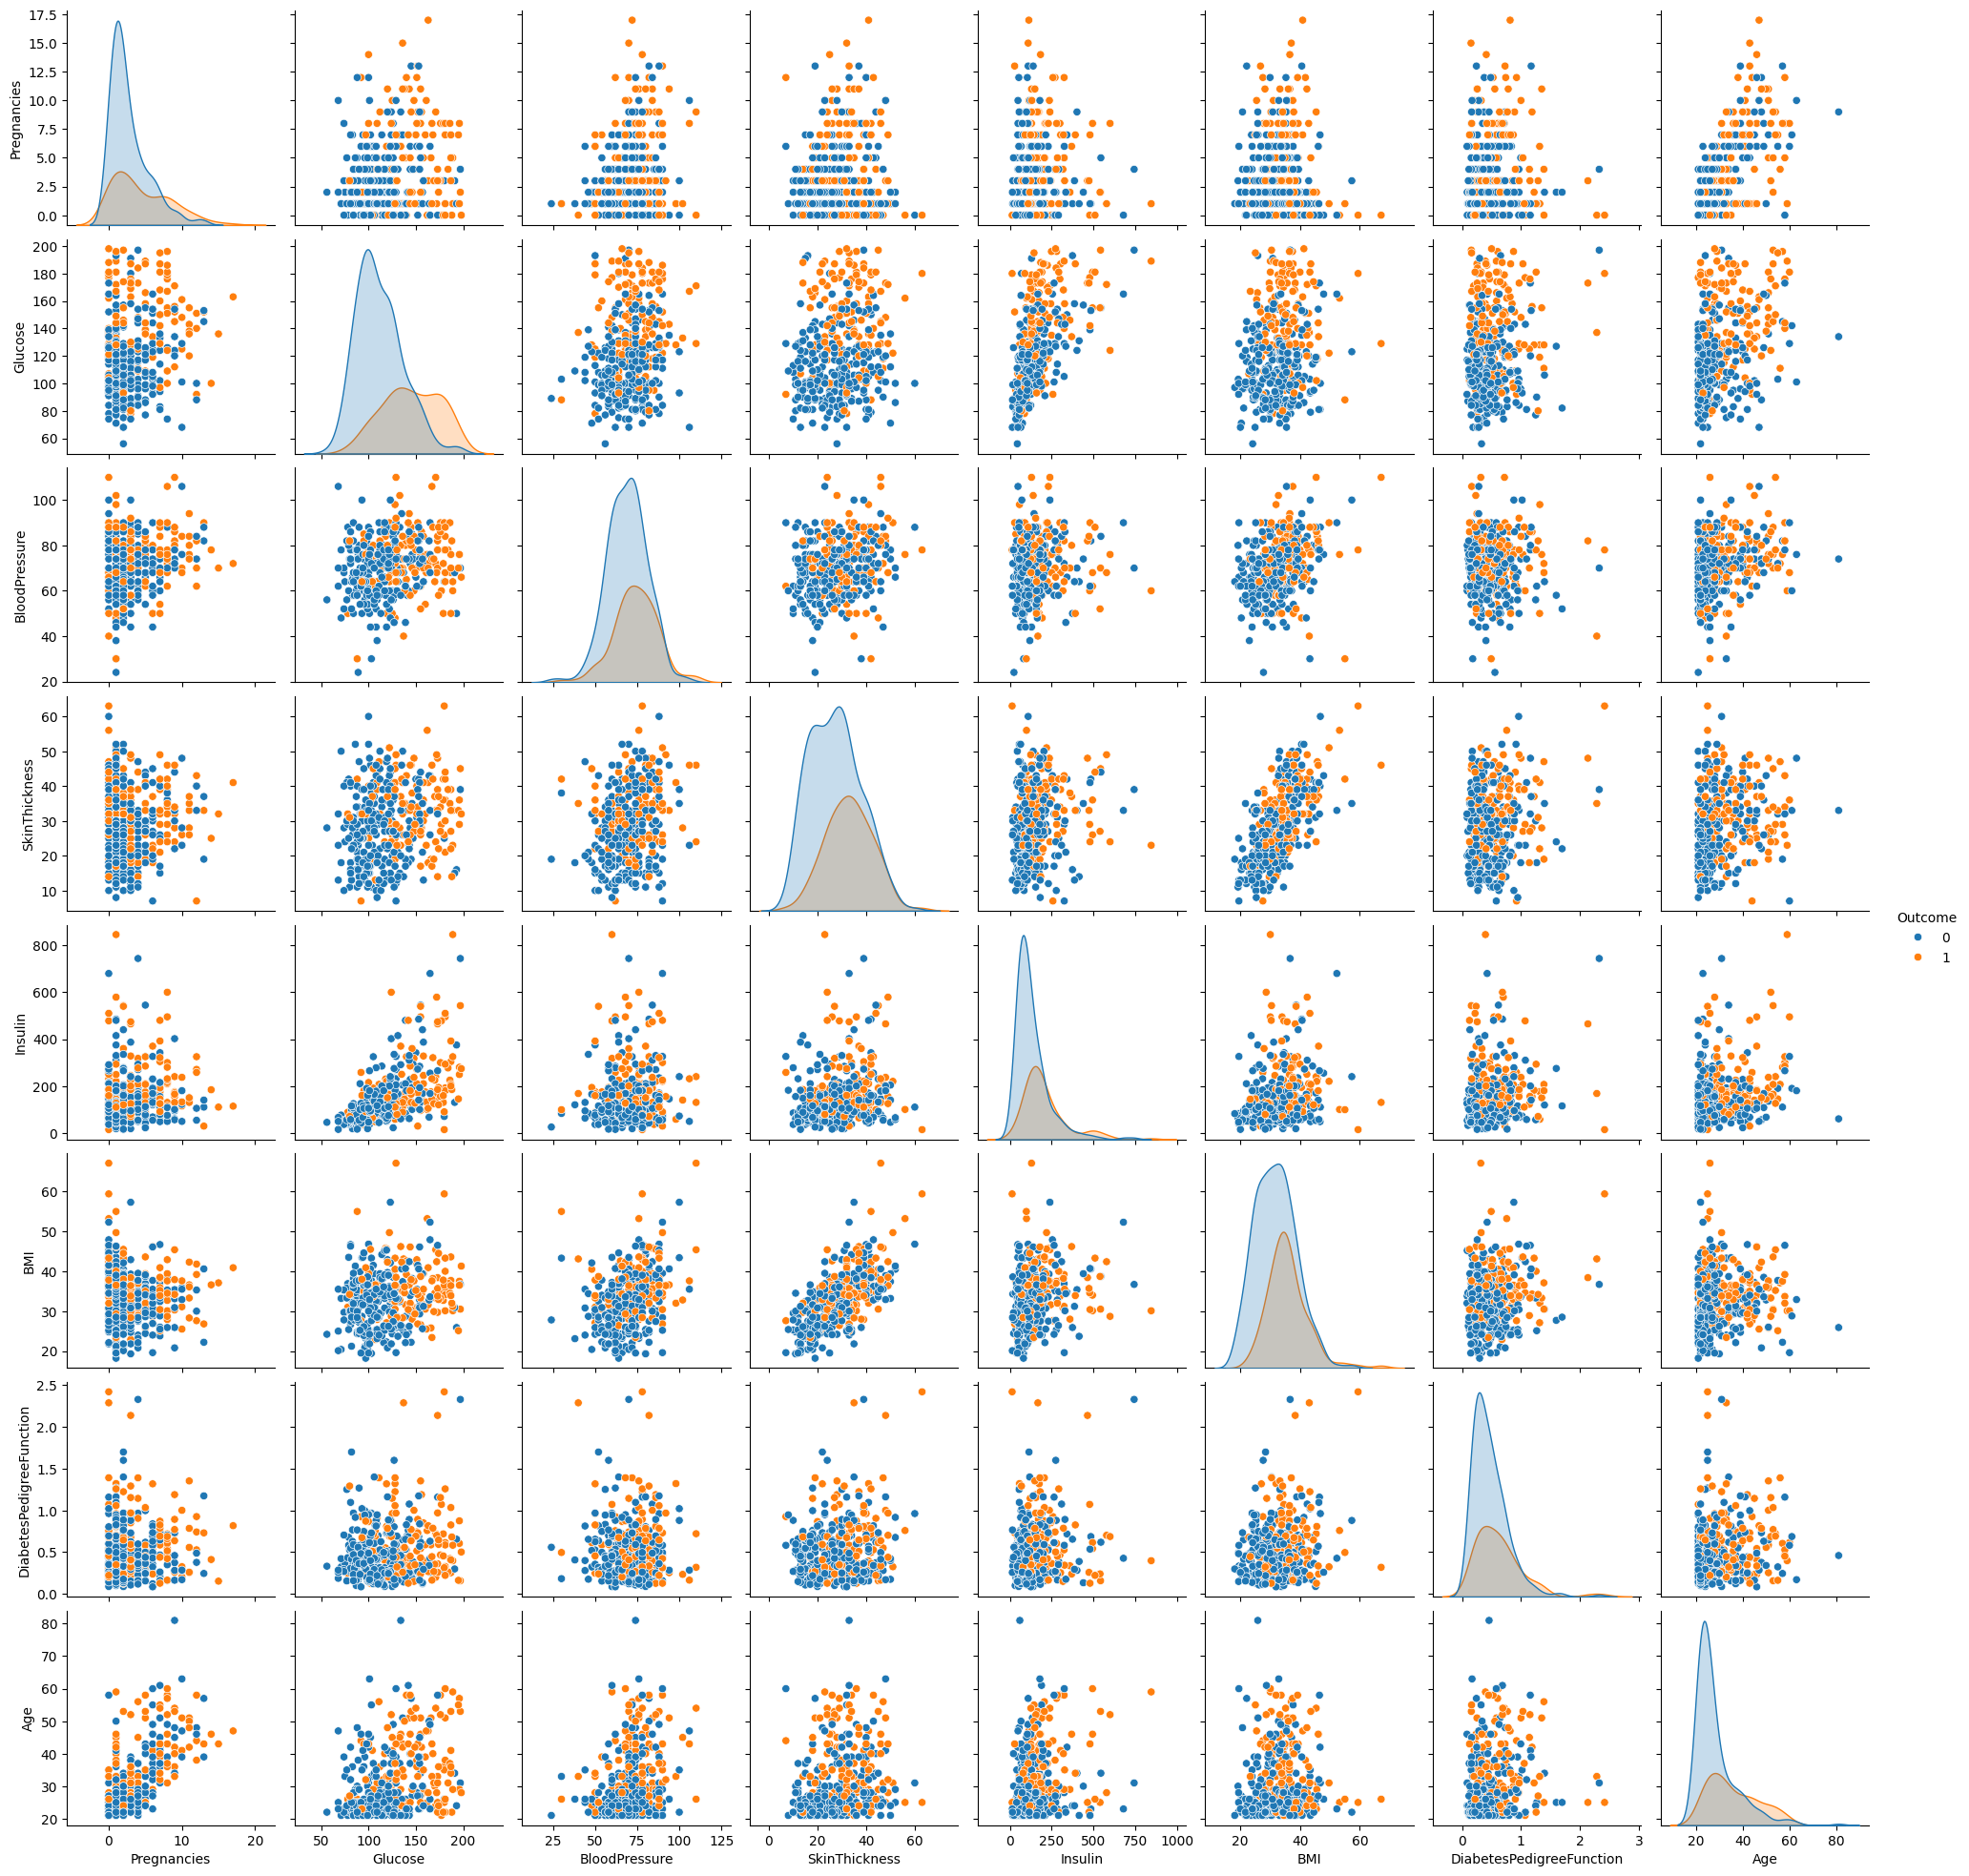

In [88]:
# Pairplot

sns.pairplot(pima_all, hue='Outcome')

##### Diabetic women tend to show larger values of age, BMI, insulin, skin thickness, blood pressure, and pregnancies.
##### The feature that it is possible to see 2 distinct groups (diabetic and non diabetic) is glucose.

##### https://www.collaborat.com/pima-diabetes-data-discovery-predictive-model/

## Logic Regression

In [89]:
#1st Iteration - 8 variables
var1=["Pregnancies", "Glucose","BloodPressure","SkinThickness","Insulin", "BMI","DiabetesPedigreeFunction", "Age"]
X=pima_all[var1]
y=pima_all.Outcome

In [90]:
## Defining the model and assigning Y (Dependent) and X (Independent Variables)
logit_model=sm.Logit(y,X)

## Fitting the model and publishing the results
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.563677
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Wed, 01 May 2024   Pseudo R-squ.:                  0.1128
Time:                        14:22:16   Log-Likelihood:                -220.96
converged:                       True   LL-Null:                       -249.05
Covariance Type:            nonrobust   LLR p-value:                 8.717e-10
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1299      0.049      2.655      0.008       0.034

##### This model can explain 56% of the variation in dependent variable. SkinThickness, BMI, Diabetes Pedigree Function, Age, and Insulin are attributes to be eliminated in the next model. as variables that influence the outcome should have a p-value less than 0.05.

In [91]:
#2nd Iteration - 3 variables
var2=["Pregnancies", "Glucose","BloodPressure"]
X=pima_all[var2]
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.574607
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  392
Model:                          Logit   Df Residuals:                      389
Method:                           MLE   Df Model:                            2
Date:                Wed, 01 May 2024   Pseudo R-squ.:                 0.09558
Time:                        14:22:16   Log-Likelihood:                -225.25
converged:                       True   LL-Null:                       -249.05
Covariance Type:            nonrobust   LLR p-value:                 4.597e-11
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Pregnancies       0.1405      0.037      3.826      0.000       0.069       0.212
Glucose           0.

##### This model can explain 57% of the variation in dependent variable. All the variables show a p-value < 0.005.

In [92]:
logreg = LogisticRegression()
var2=["Pregnancies", "Glucose","BloodPressure"]
X=pima_all[var2]
y=pima_all.Outcome
logreg.fit(X,y)

## Defining the y_pred variable for the predicting values.
y_pred=logreg.predict(X)

## Calculating the precision of the model
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       262
           1       0.68      0.55      0.61       130

    accuracy                           0.77       392
   macro avg       0.74      0.71      0.72       392
weighted avg       0.76      0.77      0.76       392



##### The model precision of model #2 (3 variables) is 77%.

In [93]:
## Confusion matrix gives the number of cases that the model is able to accurately predict the outcomes, and the number of cases the model gives false positive and false negatives
confusion_matrix = confusion_matrix(y, y_pred)
print(confusion_matrix)

[[229  33]
 [ 59  71]]


##### The confusion matrix shows that 234 + 69 are correct predictions and 61 + 28 are incorrect predictions.

## Classifier

In [94]:
# Predict the outcome - knn

inputs = pima_all[['Glucose', 'Insulin', 'SkinThickness', 'BMI', 'Age']]

In [95]:
outputs = pima_all['Outcome']

In [96]:
knn = nei.KNeighborsClassifier(n_neighbors=5)

In [97]:
knn.fit(inputs, outputs)

KNeighborsClassifier()

In [98]:
# Evaluate knn

(knn.predict(inputs) == outputs).sum()

322

##### From 392, 322 got correct outcome predicted.

In [99]:
#Split the train set - 1/3 is to test

inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs,outputs, test_size =0.33)

In [100]:
knn = nei.KNeighborsClassifier(n_neighbors=5)
knn.fit(inputs_train, outputs_train)

KNeighborsClassifier()

In [101]:
(knn.predict(inputs_test) == outputs_test).sum()

91

In [102]:
#Count how many women are Positive (1) and Negative (0) for diabetes in the test set

outputs_test.value_counts()

Outcome
0    86
1    44
Name: count, dtype: int64

## Check classification accuracy with knn = 5

In [103]:
outputs_pred = knn.predict(inputs_test)
accuracy = metrics.accuracy_score(outputs_test, outputs_pred)
accuracy

0.7

In [104]:
# 10-fold cross-validation with knn = 5

scores = cross_val_score (knn, inputs, outputs, cv =10, scoring = 'accuracy')
scores

array([0.725     , 0.8       , 0.64102564, 0.61538462, 0.64102564,
       0.74358974, 0.66666667, 0.82051282, 0.76923077, 0.79487179])

In [105]:
scores.mean()

0.7217307692307692

## Optimal value of k

In [106]:
k_range = range(1,41)
k_scores = []

In [107]:
for k in k_range:
    knn = nei.KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score (knn, inputs, outputs, cv = 10, scoring = 'accuracy')
    k_scores.append(scores.mean())

In [108]:
k_scores

[0.7222435897435897,
 0.7396794871794872,
 0.7297435897435897,
 0.7369871794871795,
 0.7217307692307692,
 0.7396153846153846,
 0.7522435897435897,
 0.7523717948717948,
 0.7499358974358974,
 0.7625641025641026,
 0.7702564102564102,
 0.7625641025641026,
 0.7652564102564102,
 0.7574358974358975,
 0.7473717948717948,
 0.7472435897435897,
 0.7575,
 0.7549358974358974,
 0.752371794871795,
 0.7575641025641026,
 0.755,
 0.7498076923076923,
 0.7472435897435897,
 0.7548717948717949,
 0.7472435897435898,
 0.7497435897435898,
 0.7471794871794872,
 0.7523076923076923,
 0.7471794871794872,
 0.7523076923076923,
 0.7548717948717949,
 0.7574358974358975,
 0.7548717948717949,
 0.7523717948717948,
 0.7574358974358975,
 0.7574358974358975,
 0.7676282051282051,
 0.7625641025641026,
 0.76,
 0.7599358974358974]

Text(0, 0.5, 'Cross-validation accuracy')

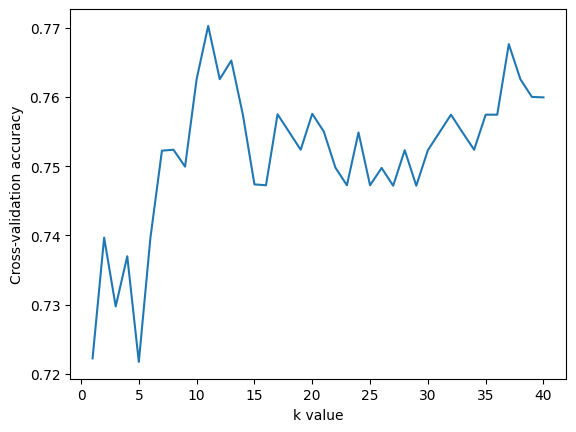

In [109]:
#Visualise best k number

plt.plot(k_range, k_scores)
plt.xlabel ('k value')
plt.ylabel('Cross-validation accuracy')

In [110]:
# Optimal value for k is 10

knn = nei.KNeighborsClassifier(n_neighbors=10)
knn.fit(inputs_train, outputs_train)

KNeighborsClassifier(n_neighbors=10)

In [111]:
(knn.predict(inputs_test) == outputs_test).sum()

88

In [112]:
outputs_pred = knn.predict(inputs_test)
accuracy = metrics.accuracy_score(outputs_test, outputs_pred)
accuracy #76.1%

0.676923076923077

In [122]:
scores = cross_val_score (knn, inputs, outputs, cv =10, scoring = 'accuracy')
scores #accuracy scores arrays (from 61.5% to 84.6%)

array([0.8       , 0.8       , 0.69230769, 0.61538462, 0.69230769,
       0.84615385, 0.71794872, 0.87179487, 0.79487179, 0.79487179])

In [123]:

scores.mean()

0.7625641025641026

## Cross Validation

### Recursive feature elimination with cross-validation

In [128]:
kf = KFold(n_splits=10, shuffle=False)

In [130]:
skf = StratifiedKFold(n_splits=10,)

In [131]:
lg = LogisticRegression()

In [132]:
rfecv = RFECV (estimator=lg,step=1, cv=skf, scoring='accuracy')

In [133]:
rfecv.fit(inputs, outputs)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=LogisticRegression(), scoring='accuracy')

In [ ]:
plt.figure()
plt.title('Recursive Feature Elimination with Logistic Regression')
plt.xlabel('Number of selected features')
plt.ylabel('10-fold Cross Validation')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)

plt.show()

#Optical number of features (=5) more suitable to predict the outcome

In [135]:
feature_names = pima_all.columns[:10]
feature_names

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [136]:
X = pima_all[feature_names]

In [137]:
new_features = list(filter(lambda x: x[1],zip(feature_names, rfecv.support_)))
new_features

[('Pregnancies', True), ('SkinThickness', True), ('Insulin', True)]

##### new_features are the features more suitable to predict the outcome (Diabetes)

### Knn and Accuracy score - new features (inputs) and optimal k value

In [138]:
new_inputs = pima_all[['Pregnancies','Glucose', 'BloodPressure','SkinThickness']]

In [139]:
knn = nei.KNeighborsClassifier(n_neighbors=10)

In [140]:
knn.fit(new_inputs, outputs)

KNeighborsClassifier(n_neighbors=10)

In [141]:
(knn.predict(new_inputs) == outputs).sum()

304

In [142]:
new_inputs_train, new_inputs_test, outputs_train, outputs_test = mod.train_test_split(new_inputs,outputs, test_size =0.33)

In [143]:
knn.fit(new_inputs_train, outputs_train)

KNeighborsClassifier(n_neighbors=10)

In [144]:
(knn.predict(new_inputs_test) == outputs_test).sum()

101

In [145]:
outputs_pred_new_inputs = knn.predict(new_inputs_test)
accuracy = metrics.accuracy_score(outputs_test, outputs_pred_new_inputs)
accuracy

0.7769230769230769

In [146]:
scores = cross_val_score (knn, new_inputs, outputs, cv =10, scoring = 'accuracy')
scores.mean()

0.7551923076923076

### Logistic Regression

In [147]:
lg = LogisticRegression()

In [148]:
lg_accuracy = cross_val_score(lg,inputs,outputs,cv=10,scoring='accuracy')

In [149]:
lg_accuracy.mean()

0.7828846153846154

##### Logistic Regression has a better average accuracy score than knn.

In [150]:
lg.fit(inputs_train,outputs_train)

LogisticRegression()

In [151]:
outputs_pred=lg.predict(inputs_test)
accuracy_lg = metrics.accuracy_score(outputs_test, outputs_pred)
accuracy_lg

0.6538461538461539

### Naive Bayes

In [152]:
mnb = MultinomialNB()
mnb.fit(inputs_train, outputs_train)
out_pred = mnb.predict(inputs_test)
accuracy_mnb = accuracy_score(outputs_test, out_pred)
accuracy_mnb

0.5538461538461539

### Confusion Matrix

In [153]:
conf_mtx_nb = metrics.confusion_matrix(outputs_test, out_pred)
conf_mtx_nb

array([[56, 31],
       [27, 16]])

In [154]:
conf_mtx_new_features = metrics.confusion_matrix(outputs_test, outputs_pred_new_inputs)
conf_mtx_new_features

array([[83,  4],
       [25, 18]])

##### In reality, 46 women in the sample have DM, and 84 women do not.
##### Naive Bayes: Out of those 130 cases, the classifier predicted "yes" 30 times, and "no" 100 times.
##### New Features and k = 10 : Out of those 130 cases, the classifier predicted "yes" 43 times, and "no" 87 times.

### Precision

In [155]:
precision_nb = metrics.precision_score(outputs_test, out_pred)
precision_nb

0.3404255319148936

In [156]:
precision_new_features = metrics.precision_score(outputs_test,outputs_pred_new_inputs)
precision_new_features

0.8181818181818182

##### 80% of the time individuals who were predict to be diabetic taking in account the "new features" and the k = 10 were in fact diabetic.

### Recall

In [157]:
recall = metrics.recall_score(outputs_test, out_pred)
recall

0.37209302325581395

In [158]:
recall_new_features = metrics.recall_score(outputs_test,outputs_pred_new_inputs)
recall_new_features

0.4186046511627907

##### The "new features" and k = 10 model can identify 43.5% of the time the individuals who are diabetic in the test set.

In [159]:
class_rep = classification_report(outputs_test, out_pred)
class_rep

'              precision    recall  f1-score   support\n\n           0       0.67      0.64      0.66        87\n           1       0.34      0.37      0.36        43\n\n    accuracy                           0.55       130\n   macro avg       0.51      0.51      0.51       130\nweighted avg       0.56      0.55      0.56       130\n'

In [160]:
out_pred_prob = mnb.predict_proba(inputs_test)[:,1]
out_pred_prob

array([0.06676459, 0.9999998 , 0.93957355, 0.99264987, 0.83815557,
       0.19425231, 0.49716787, 0.06242075, 0.47613041, 0.65947133,
       0.99999959, 0.14986133, 0.01213536, 0.81497386, 0.99535029,
       0.01636864, 0.03631557, 0.03076674, 0.0182554 , 0.01650026,
       0.99999425, 0.15658697, 0.14555536, 0.15173364, 0.02770057,
       0.26956046, 0.00596689, 0.00266613, 0.02200754, 0.95808693,
       0.6838721 , 0.67953909, 0.196894  , 0.28986986, 0.02497525,
       0.78414981, 0.99627138, 0.3844159 , 1.        , 0.54589459,
       0.02415074, 0.15299915, 0.12125876, 0.01712962, 0.03365974,
       0.03004491, 0.0436233 , 0.17850812, 0.55443953, 0.99968975,
       0.01910693, 0.99999646, 0.27292595, 0.98311216, 0.79257305,
       0.045602  , 0.85727265, 0.05523037, 0.99999822, 0.51711423,
       0.08083537, 0.27542552, 0.86735017, 0.05362198, 0.06245049,
       0.22525158, 0.86349853, 0.678503  , 0.99999155, 0.03758294,
       0.18464731, 0.0668603 , 0.05773225, 0.99917513, 0.99642

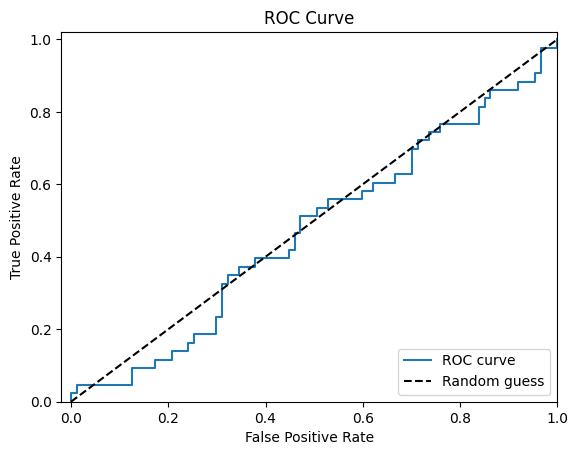

In [161]:
fpr, tpr, thresholds = roc_curve(outputs_test, out_pred_prob)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

In [162]:
ras = roc_auc_score(outputs_test, out_pred_prob)
ras

0.47153167602245394

##### The classifier is not very good at minimizing false negatives and true negatives

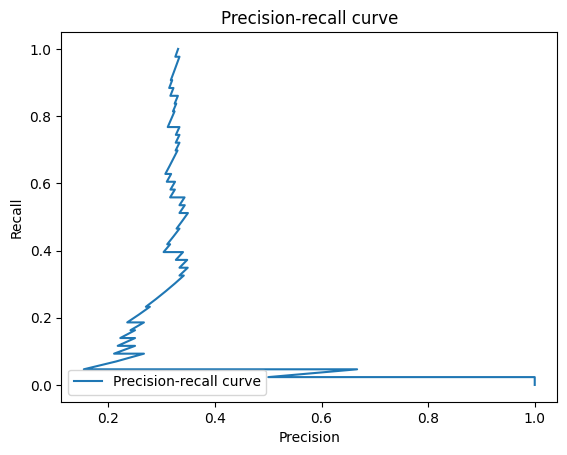

In [163]:
precision, recall, thresholds = precision_recall_curve(outputs_test, out_pred_prob)
# create plot
plt.plot(precision, recall, label='Precision-recall curve')
_ = plt.xlabel('Precision')
_ = plt.ylabel('Recall')
_ = plt.title('Precision-recall curve')
_ = plt.legend(loc="lower left")

In [164]:
aps = average_precision_score(outputs_test, out_pred_prob)
aps

0.33800893902622936

##### Low average precision score.

## CONCLUSION

##### Main conclusions will be written HERE!

## REFERENCE

1. TYNECKI P. Predict diabetes diagnosis for Pima Female Indians with Logistic Regression. 2018. Available on: https://www.kaggle.com/ptynecki/pima-indians-diabetes-prediction-with-lr-84.
2. SCHULZ LO, CHAUDHARI LS. High-Risk Populations: The Pimas of Arizona and Mexico
Curr Obes Rep. 2015 Mar 1; 4(1): 92–98. Available on: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4418458/
3. RUIZ-ALEJOS A, CARRILLO-LARCO RM, MIRANDA JJ, GILMAN RH, SMEETH L, BERNABE-Ortiz A. Skinfold thickness and the incidence of type 2 diabetes mellitus and hypertension: an analysis of the PERU MIGRANT study. Public Health Nutr. 2020;23(1):63-71. doi:10.1017/S1368980019001307
4. FRYAR CD, GU Q, OGDEN CL. Anthropometric reference data for children and adults: United States, 2007–2010. National Center for Health Statistics. Vital Health Stat 11(252). 2012.
5. VAN GAAL L., SCHEEN A. Weight Management in Type 2 Diabetes: Current and Emerging Approaches to Treatment, Diabetes Care 2015; 38(6): 1161 - 1172. Available on http://care.diabetesjournals.org/content/38/6/1161.
6. WILDING JPH. The importance of weight management in type 2 diabetes mellitus. Int J Clin Pract. 2014 Jun; 68(6): 682–691. Available on: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4238418/
7. KODESH I. Associations between Variables Regarding Diabetes for Pima Indian Women. Available on: https://rpubs.com/ikodesh/53189.
8. DIABETES UK. Oral Glucose Tolerance Test. 2019. Available on: https://www.diabetes.co.uk/oral-glucose-tolerance-test.html
9. NATIONAL INSTITUTE FOR HEALTH AND CARE EXCELLENCE - NICE. Guideline Hypertension in adults: diagnosis and management. 2019. Available on: https://www.nice.org.uk/guidance/ng136/documents/draft-guideline
10. BOER IH, BANGALORE S, BENETOS A, DAVIS AM, MICHOS ED, MUNTNER P, ROSSING P, ZOUNGAS S, BAKRIS G. Diabetes and Hypertension: A Position Statement by the American Diabetes Association. Diabetes Care 2017 Sep; 40(9): 1273-1284.
11. BLOOD PRESSURE UK. Low Blood Pressure. Available on:  http://www.bloodpressureuk.org/microsites/u40/Home/facts/Whatislow#:~:text=For%20instance%2C%20when%20the%20heart,between%2040%20to%20160%20mmHg.
12. CHANDRA-SELVI E, PAVITHRA N, SAIKUMAR P. Skin Fold Thickness in Diabetes Mellitus: A Simple Anthropometric Measurement May Bare the Different Aspects of Adipose Tissue. IOSR Journal of Dental and Medical Sciences (IOSR-JDMS) e-ISSN: 2279-0853, p-ISSN: 2279-0861.Volume 15, Issue 11 Ver. IX (November. 2016), PP 07-11.
13. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4287763/
14. https://www.sciencedirect.com/science/article/pii/S1646343913000734
15. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3417105/

# END